In [1]:
# 필요한 모듈 import 
import numpy as np
import torch
import matplotlib.pyplot as plt
import cv2

In [3]:
# sam으로 포인팅한 부분 시각화 하는 코드
def show_mask(mask, ax, random_color=False):
    if random_color:
        color = np.concatenate([np.random.random(3), np.array([0.6])], axis=0)
    else:
        color = np.array([30/255, 144/255, 255/255, 0.6])
    h, w = mask[0].shape[-2:]
    mask_image = mask[0].reshape(h, w, 1)* color.reshape(1,1,-1)
    ax.imshow(mask_image)
    
def show_points(coords, labels, ax, marker_size=120):
    pos_points = coords[labels==1]
    neg_points = coords[labels==0]
    ax.scatter(pos_points[:, 0], pos_points[:, 1], color='green', marker='*', s=marker_size, edgecolor='white', linewidth=1.25)
    ax.scatter(neg_points[:, 0], neg_points[:, 1], color='red', marker='*', s=marker_size, edgecolor='white', linewidth=1.25)   
    
def show_box(box, ax):
    x0, y0 = box[0], box[1]
    w, h = box[2] - box[0], box[3] - box[1]
    ax.add_patch(plt.Rectangle((x0, y0), w, h, edgecolor='green', facecolor=(0,0,0,0), lw=2))    

In [4]:
# 저장된 sam모델 불러오기 
import sys
sys.path.append("..")
from segment_anything import sam_model_registry, SamPredictor

sam_checkpoint = "sam_vit_h_4b8939.pth"
model_type = "vit_h"

device = "cuda:1"

sam = sam_model_registry[model_type](checkpoint=sam_checkpoint)
sam.to(device=device)

predictor = SamPredictor(sam)

_IncompatibleKeys(missing_keys=['mask_decoder.hf_token.weight', 'mask_decoder.hf_mlp.layers.0.weight', 'mask_decoder.hf_mlp.layers.0.bias', 'mask_decoder.hf_mlp.layers.1.weight', 'mask_decoder.hf_mlp.layers.1.bias', 'mask_decoder.hf_mlp.layers.2.weight', 'mask_decoder.hf_mlp.layers.2.bias', 'mask_decoder.compress_vit_feat.0.weight', 'mask_decoder.compress_vit_feat.0.bias', 'mask_decoder.compress_vit_feat.1.weight', 'mask_decoder.compress_vit_feat.1.bias', 'mask_decoder.compress_vit_feat.3.weight', 'mask_decoder.compress_vit_feat.3.bias', 'mask_decoder.embedding_encoder.0.weight', 'mask_decoder.embedding_encoder.0.bias', 'mask_decoder.embedding_encoder.1.weight', 'mask_decoder.embedding_encoder.1.bias', 'mask_decoder.embedding_encoder.3.weight', 'mask_decoder.embedding_encoder.3.bias', 'mask_decoder.embedding_maskfeature.0.weight', 'mask_decoder.embedding_maskfeature.0.bias', 'mask_decoder.embedding_maskfeature.1.weight', 'mask_decoder.embedding_maskfeature.1.bias', 'mask_decoder.embedd

In [105]:
# 이미지 불러서 sam 모델에 넣어 inference
img = cv2.imread("/home/minjung/sam-hq/class2_image/1103.png")
predictor.set_image(img)

In [106]:
# 종양이 있는 point를 클릭
import warnings
warnings.filterwarnings(action='ignore')

import cv2

img = cv2.imread('/home/minjung/sam-hq/class2_image/1103.png')

def onMouse(event, x, y, flags, param) :
    if event == cv2.EVENT_LBUTTONDOWN:
        print((x, y))

cv2.imshow('image', img)
cv2.setMouseCallback('image', onMouse)

while True:
    if cv2.waitKey(0):
        break
        
        
cv2.destroyAllWindows()

QObject::moveToThread: Current thread (0x79336fd0) is not the object's thread (0x95444860).
Cannot move to target thread (0x79336fd0)

QObject::moveToThread: Current thread (0x79336fd0) is not the object's thread (0x95444860).
Cannot move to target thread (0x79336fd0)

QObject::moveToThread: Current thread (0x79336fd0) is not the object's thread (0x95444860).
Cannot move to target thread (0x79336fd0)

QObject::moveToThread: Current thread (0x79336fd0) is not the object's thread (0x95444860).
Cannot move to target thread (0x79336fd0)

QObject::moveToThread: Current thread (0x79336fd0) is not the object's thread (0x95444860).
Cannot move to target thread (0x79336fd0)

QObject::moveToThread: Current thread (0x79336fd0) is not the object's thread (0x95444860).
Cannot move to target thread (0x79336fd0)

QObject::moveToThread: Current thread (0x79336fd0) is not the object's thread (0x95444860).
Cannot move to target thread (0x79336fd0)

QObject::moveToThread: Current thread (0x79336fd0) is n

(330, 206)


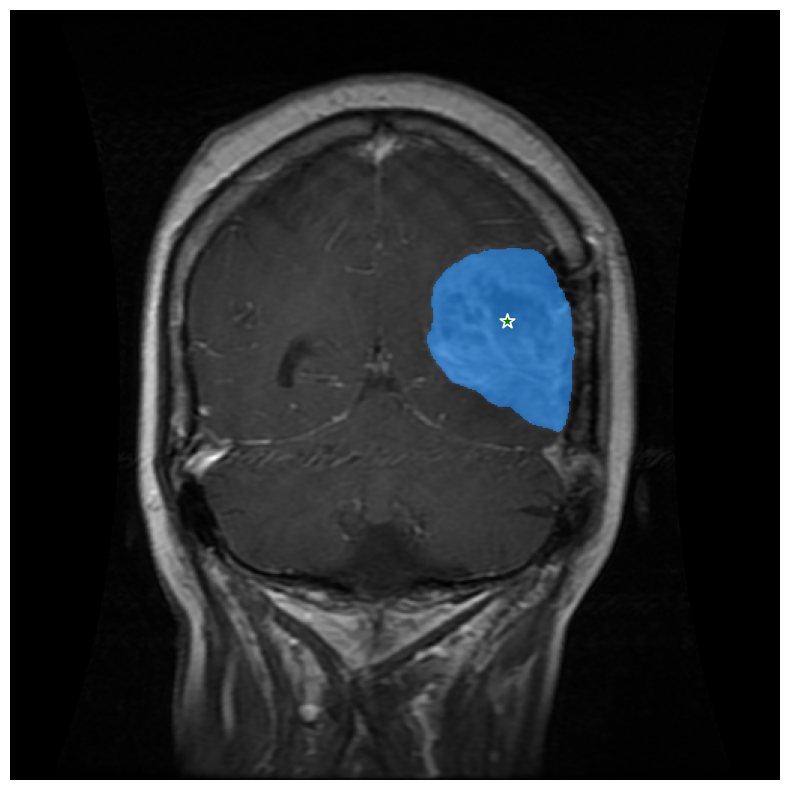

In [109]:
# 내가 어디를 찍어서 어떤 마스크가 만들어졌는지 확인 가능
# 이거 계속 보면서 마스크 조절해나가기
plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
show_mask(masks, plt.gca())
show_points(input_point, input_label, plt.gca())
plt.axis('off')
plt.show()

In [107]:
input_point = np.array([[330, 206]])
input_label = np.array([1])

In [108]:
masks, scores, logits = predictor.predict(
    point_coords=input_point,
    point_labels=input_label,
    multimask_output=True,
)

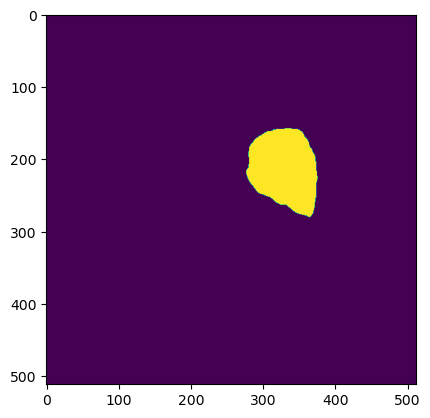

In [110]:
# 만들어진 마스크 프린트 해보기 
plt.imshow(masks[0])

In [111]:
# 0과 1로 되어 있는 것을 0과 255로 바꿔주기 
mask = np.where(masks[0]==False, 0, 255)

In [112]:
# 원하는 위치에 마스크 저장하기 
cv2.imwrite("/home/minjung/sam-hq/class2_sam_mask_dy2/1103.png", mask)

True